# Project Python Foundations: FoodHub Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user --no-warn-script-location

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 5.6 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [32]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!jupyter nbconvert --to html '/content/drive/MyDrive/AIML-UTAustin/Learner_Notebook_Full_Code .ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML-UTAustin/Learner_Notebook_Full_Code .ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 26 image(s).
[NbConvertApp] Writing 1288984 bytes to /content/drive/MyDrive/AIML-UTAustin/Learner_Notebook_Full_Code .html


In [8]:
# Write your code here to read the data
dataframe = pd.read_csv('/content/drive/MyDrive/AIML-UTAustin/foodhub_order.csv')

In [34]:
# Write your code here to view the first 5 rows
dataframe.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [35]:
# Write your code here
dataframe.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [36]:
# Write your code here
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [37]:
# Write your code here
dataframe.isnull().sum()
dataframe.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [38]:
# Write your code here
#dataframe.describe() #for all columns of data
dataframe.food_preparation_time.describe()  #for food preparation column

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [39]:
# Write the code here
#dataframe.rating.value_counts()
#dataframe.rating.value_counts()[0]
dataframe.query('rating == "Not given"').shape[0]

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [40]:
# Write the code here
# check unique order ID
dataframe['order_id'].nunique()


1898

In [41]:
# check unique customer ID
dataframe['customer_id'].nunique()

1200

In [42]:
# check unique Restaurant Name
dataframe['restaurant_name'].nunique()

178

In [44]:
# Check unique cuisine type
dataframe['cuisine_type'].nunique()

14

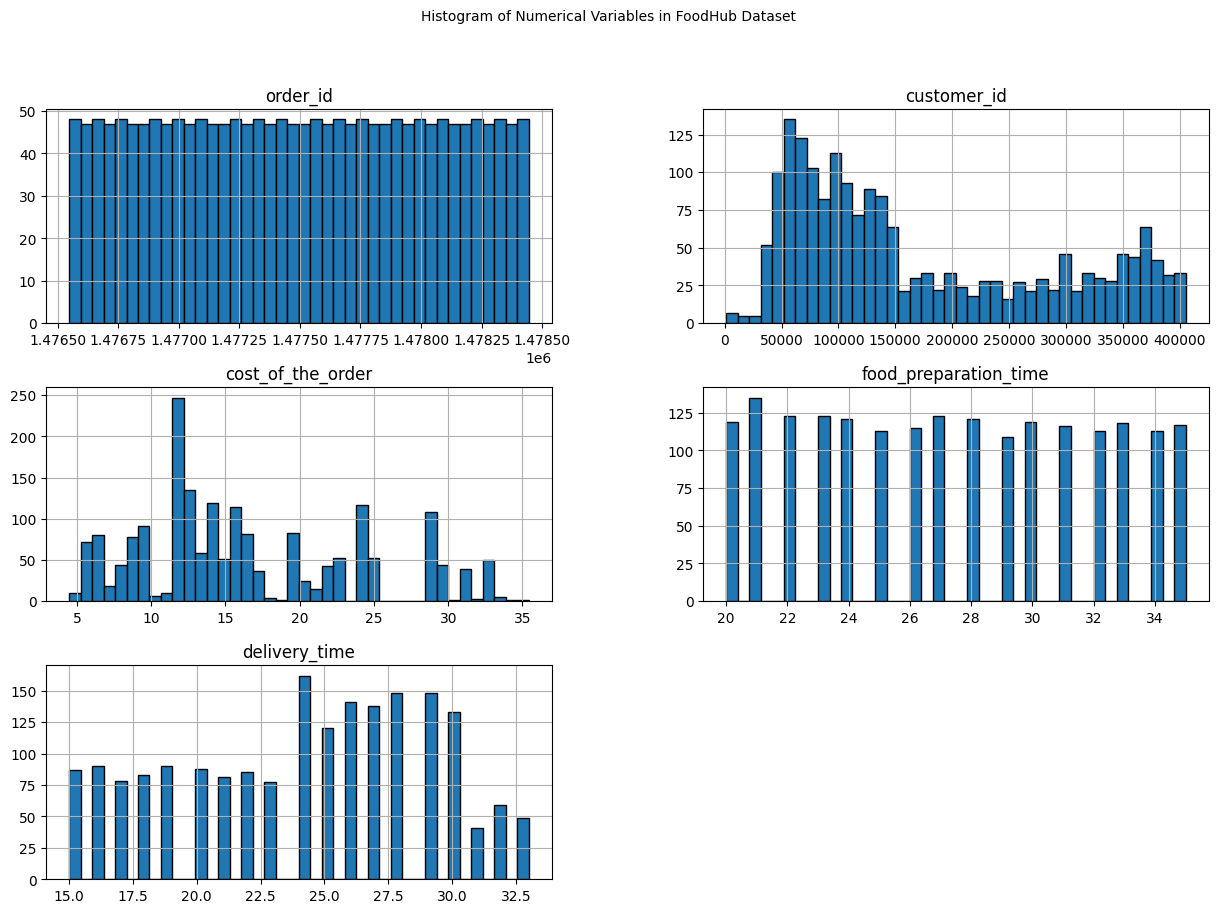

In [19]:
#Histograms show the frequency distribution of numerical data.
# Plot histograms for all numerical columns
dataframe.hist(figsize=(15, 10), bins=40, edgecolor="black")
plt.suptitle("Histogram of Numerical Variables in FoodHub Dataset", fontsize=10)
plt.show()

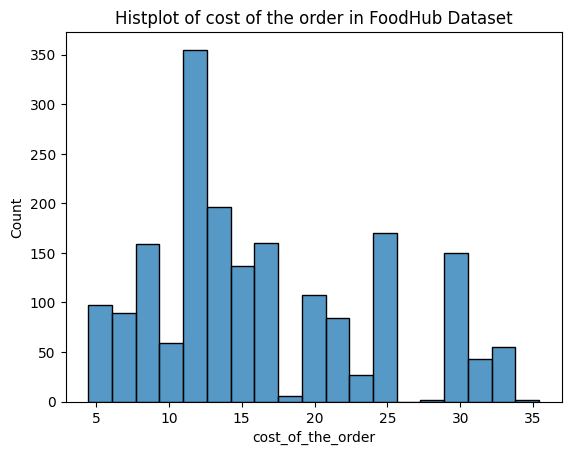

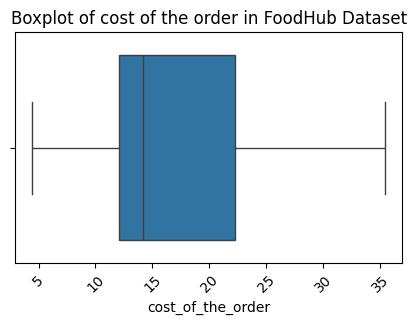

<Axes: title={'center': 'Countplot of cost of the order in FoodHub Dataset'}, xlabel='cost_of_the_order', ylabel='count'>

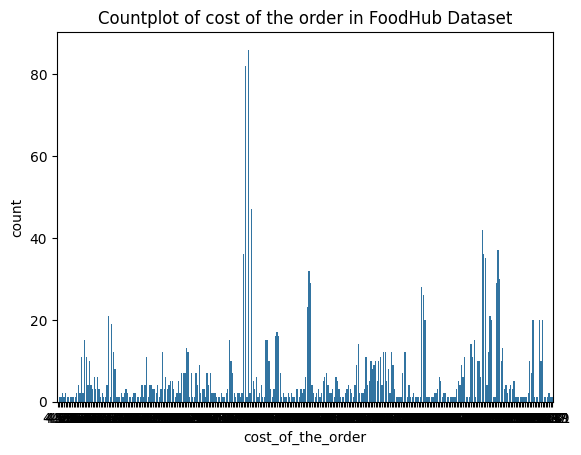

In [27]:
# Histogram for the cost of the order colmn
plt.title("Histplot of cost of the order in FoodHub Dataset")
sns.histplot(data=dataframe,x='cost_of_the_order')
plt.show()

#Boxplots help visualize the spread and outliers in the data.
# Boxplots for the cost of order
plt.figure(figsize=(5, 3))
plt.title("Boxplot of cost of the order in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'cost_of_the_order')
plt.xticks(rotation=45)
plt.show()

# Plot a bar graph for cost of the order
plt.title("Countplot of cost of the order in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'cost_of_the_order')

In [ ]:
# Check the unique values in day of the week column
dataframe['day_of_the_week'].nunique()

2

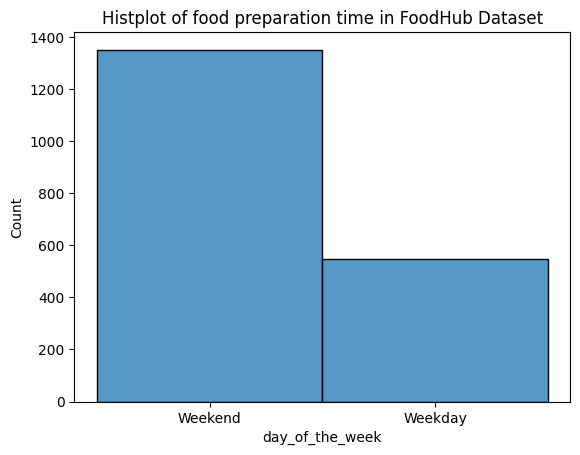

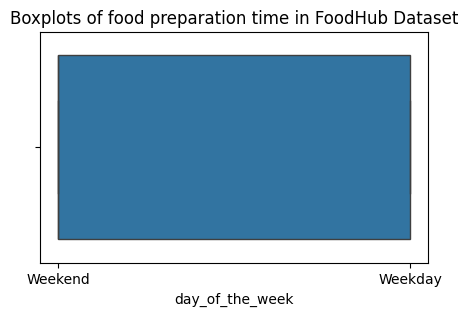

<Axes: xlabel='day_of_the_week', ylabel='count'>

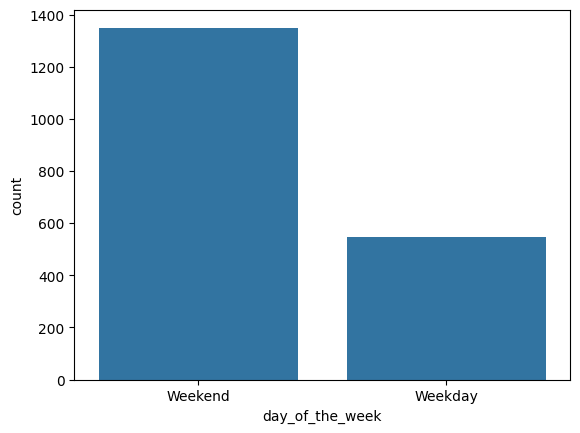

In [20]:
# Histogram for the Day of the week column
plt.title("Histplot of food preparation time in FoodHub Dataset")
sns.histplot(data = dataframe,x = 'day_of_the_week')
plt.show()

# Boxplots for the Day of the week column
plt.figure(figsize = (5, 3))
plt.title("Boxplot of food preparation time in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'day_of_the_week')
plt.show()

# Plot a bar graph for day of the week column
plt.title("Countplot of day of the week in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'day_of_the_week')

In [ ]:
# Check the unique values for the 'rating' column
dataframe['rating'].nunique()

4

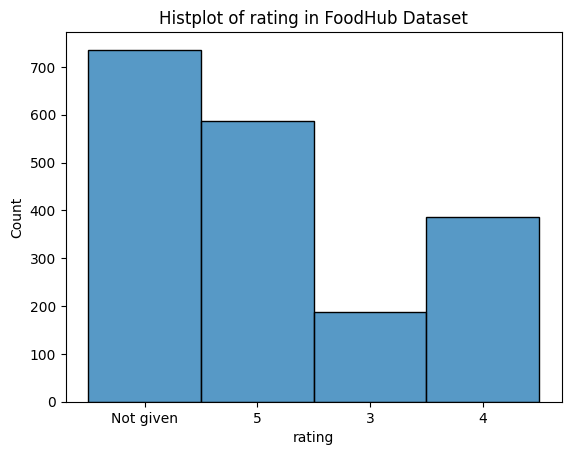

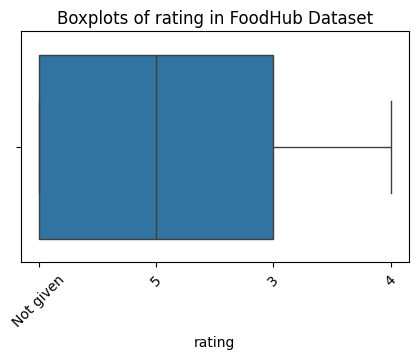

<Axes: title={'center': 'Countplot of rating in FoodHub Dataset'}, xlabel='rating', ylabel='count'>

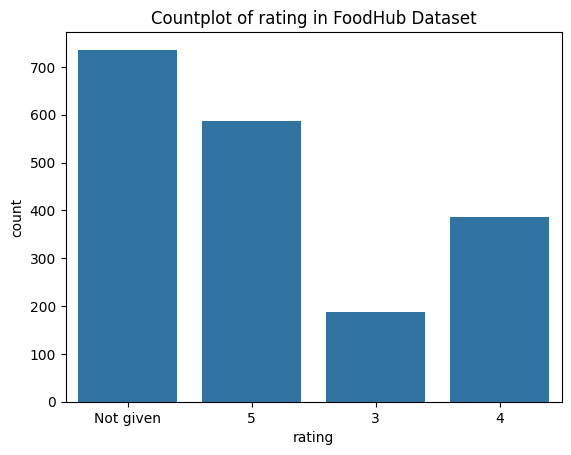

In [21]:
# Histogram for the rating column
sns.histplot(data = dataframe,x = 'rating')
plt.title("Histplot of rating in FoodHub Dataset")
plt.show()

# Boxplots for the rating column
plt.figure(figsize = (5, 3))
plt.title("Boxplot of rating in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'rating')
plt.xticks(rotation=45)
plt.show()

# Countplot for the rating column
plt.title("Countplot of rating in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'rating')

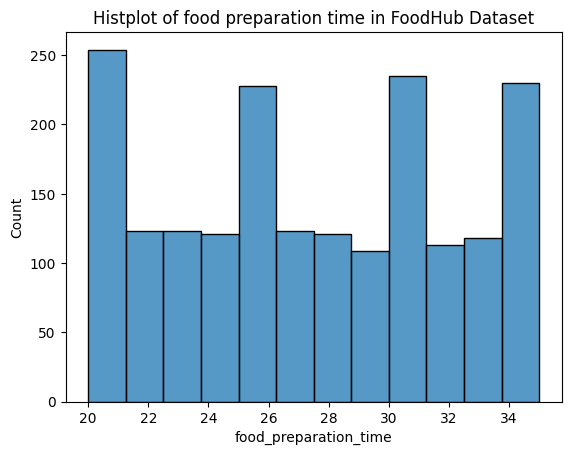

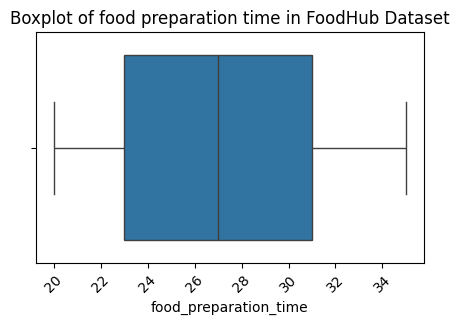

<Axes: title={'center': 'Countplot of food preparation time in FoodHub Dataset'}, xlabel='food_preparation_time', ylabel='count'>

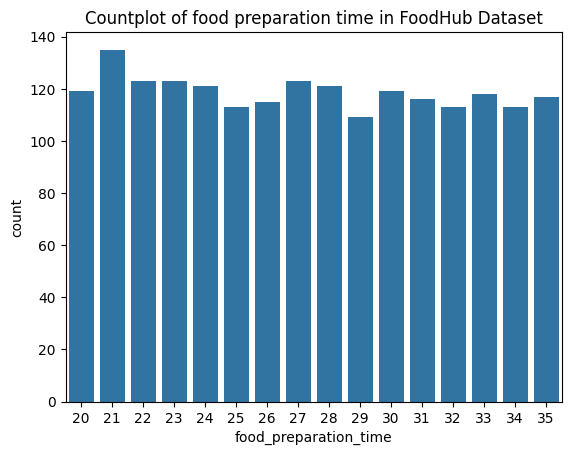

In [22]:
# Histogram for the food preparation time
sns.histplot(data=dataframe,x='food_preparation_time')
plt.title("Histplot of food preparation time in FoodHub Dataset")
plt.show()

# Boxplots for the food preparation time
plt.figure(figsize = (5, 3))
plt.title("Boxplot of food preparation time in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'food_preparation_time')
plt.xticks(rotation = 45)
plt.show()

# Plot a bar graph for the food preparation time
plt.title("Countplot of food preparation time in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'food_preparation_time')

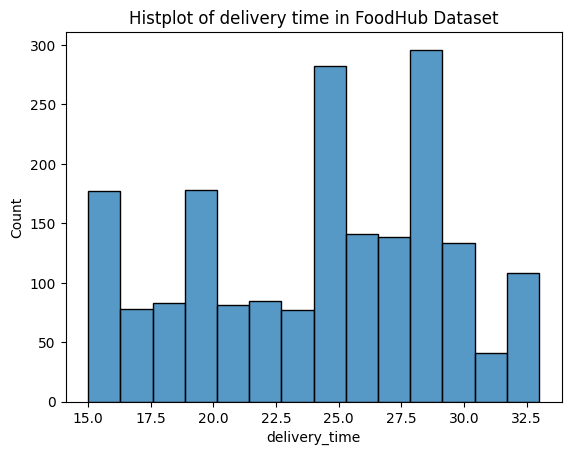

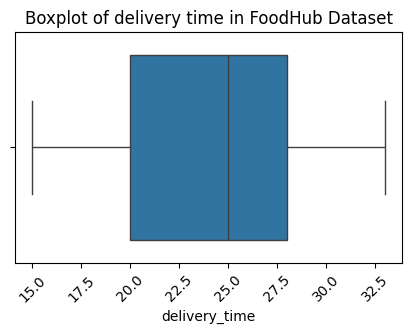

<Axes: title={'center': 'Countplot of delivery time in FoodHub Dataset'}, xlabel='delivery_time', ylabel='count'>

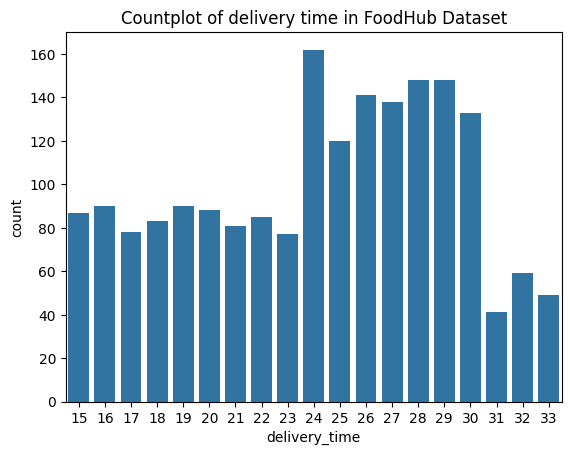

In [28]:
# Histogram for the delivery time
sns.histplot(data = dataframe,x = 'delivery_time')
plt.title("Histplot of delivery time in FoodHub Dataset")
plt.show()

# Boxplots for the delivery time
plt.figure(figsize = (5, 3))
plt.title("Boxplot of delivery time in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'delivery_time')
plt.xticks(rotation = 45)
plt.show()

# Plot a bar graph for delivery time
plt.title("Countplot of delivery time in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'delivery_time')

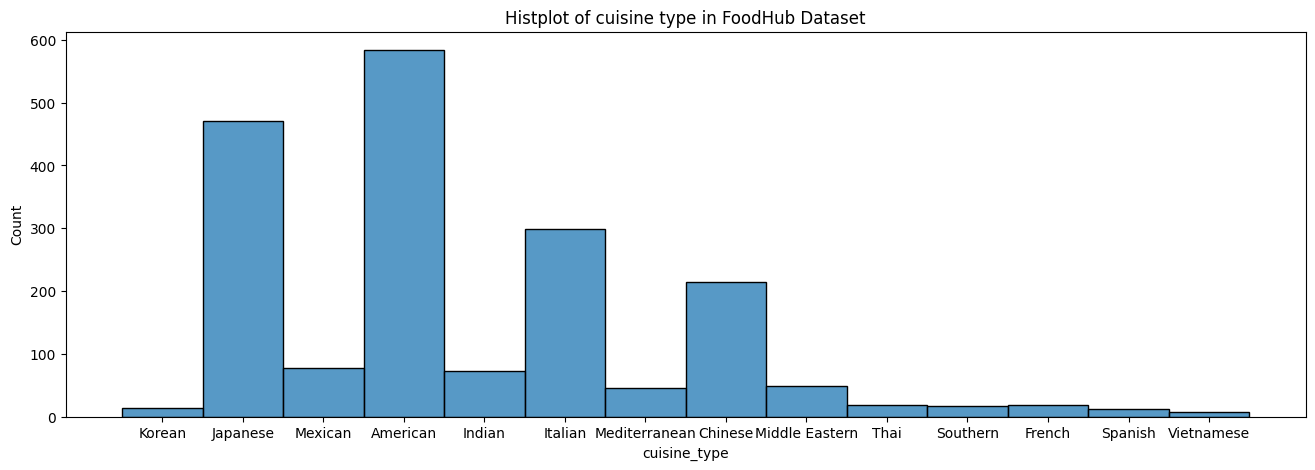

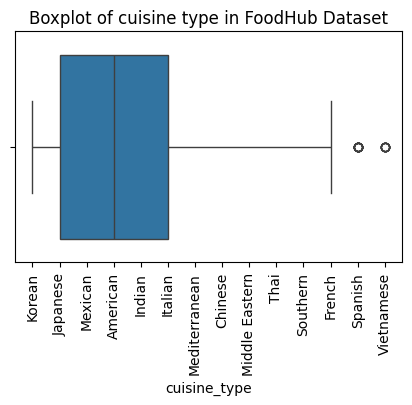

<Axes: title={'center': 'Countplot of cuisine type in FoodHub Dataset'}, xlabel='cuisine_type', ylabel='count'>

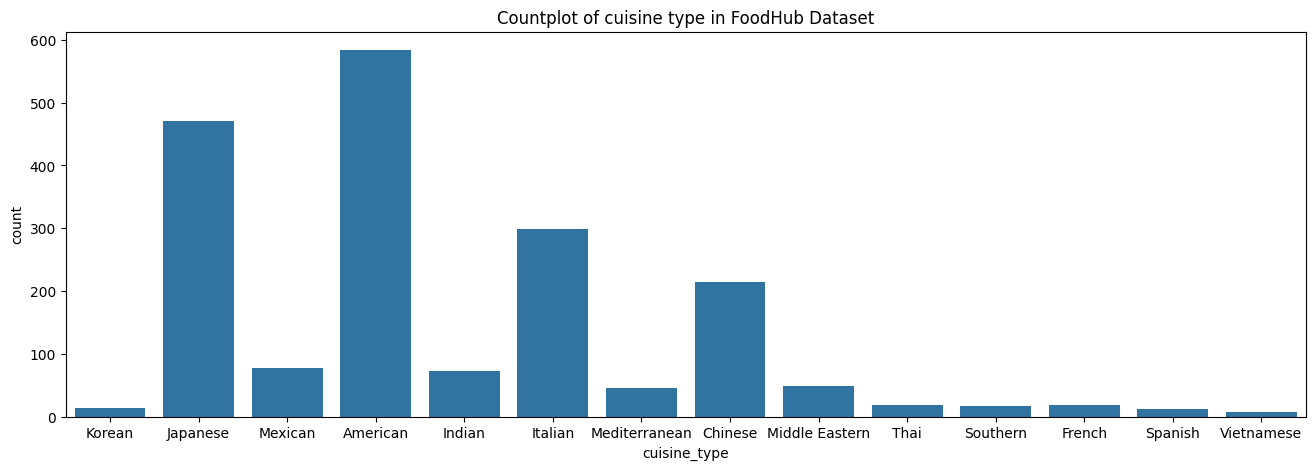

In [29]:
# Histogram for the cuisine type
plt.figure(figsize = (16,5))
plt.title("Histplot of cuisine type in FoodHub Dataset")
sns.histplot(data = dataframe,x = 'cuisine_type')
plt.show()

# Boxplots for the cuisine type
plt.figure(figsize = (5, 3))
plt.title("Boxplot of cuisine type in FoodHub Dataset")
sns.boxplot(data = dataframe, x = 'cuisine_type')
plt.xticks(rotation = 90)
plt.show()

# Create a countplot for cuisine type.
plt.figure(figsize = (16,5))
plt.title("Countplot of cuisine type in FoodHub Dataset")
sns.countplot(data = dataframe, x = 'cuisine_type')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Top 5 restaurants with highest number of orders
dataframe['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
dataframe[dataframe['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Get the orders having cost above 20 dollars
dataframe_above_20 = dataframe[dataframe['cost_of_the_order'] > 20]
print('Number of total orders that cost above 20 dollars :', dataframe_above_20.shape[0])

# Calculate percentage of such orders in the dataset
order_percentage = (dataframe_above_20.shape[0] / dataframe.shape[0]) * 100
print("Percentage of orders above 20 dollars :", round(order_percentage, 2), '%')

Number of total orders that cost above 20 dollars : 555
Percentage of orders above 20 dollars : 29.24 %


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
print("Mean order delivery time :", round(dataframe['delivery_time'].mean(),2), 'minutes')

Mean oder delivery time : 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
dataframe['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cuisine vs Cost of the order

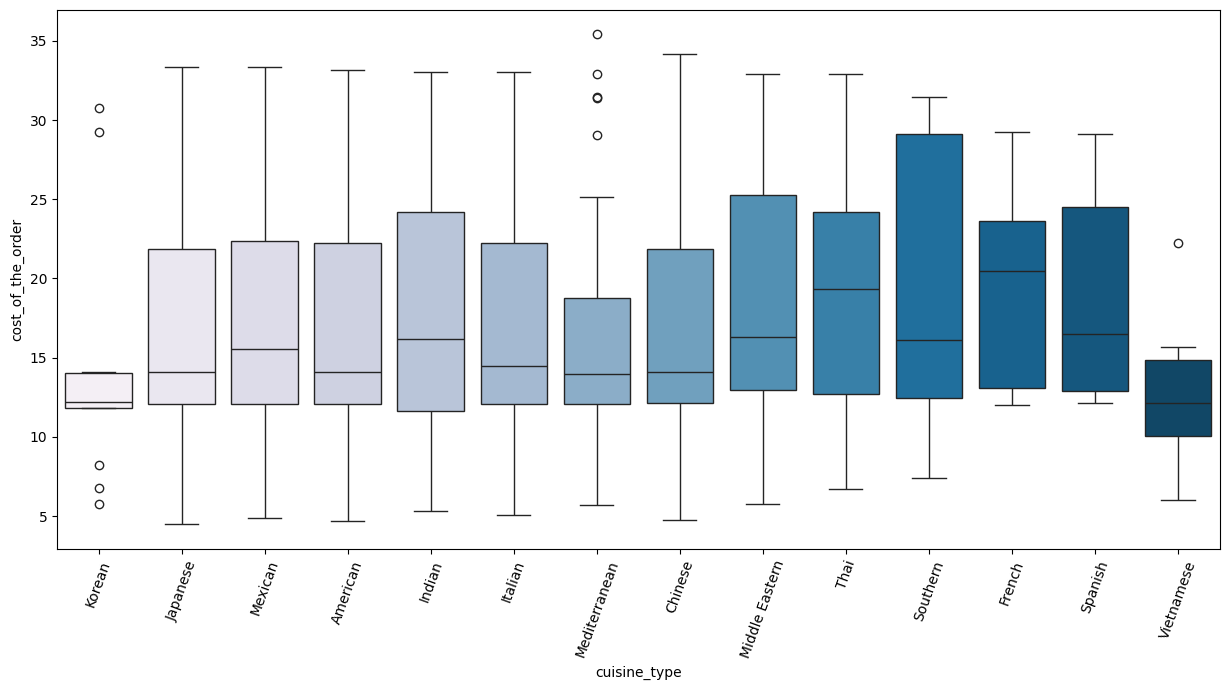

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = dataframe, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 70)
plt.show()

Cuisine vs Food Preparation Time

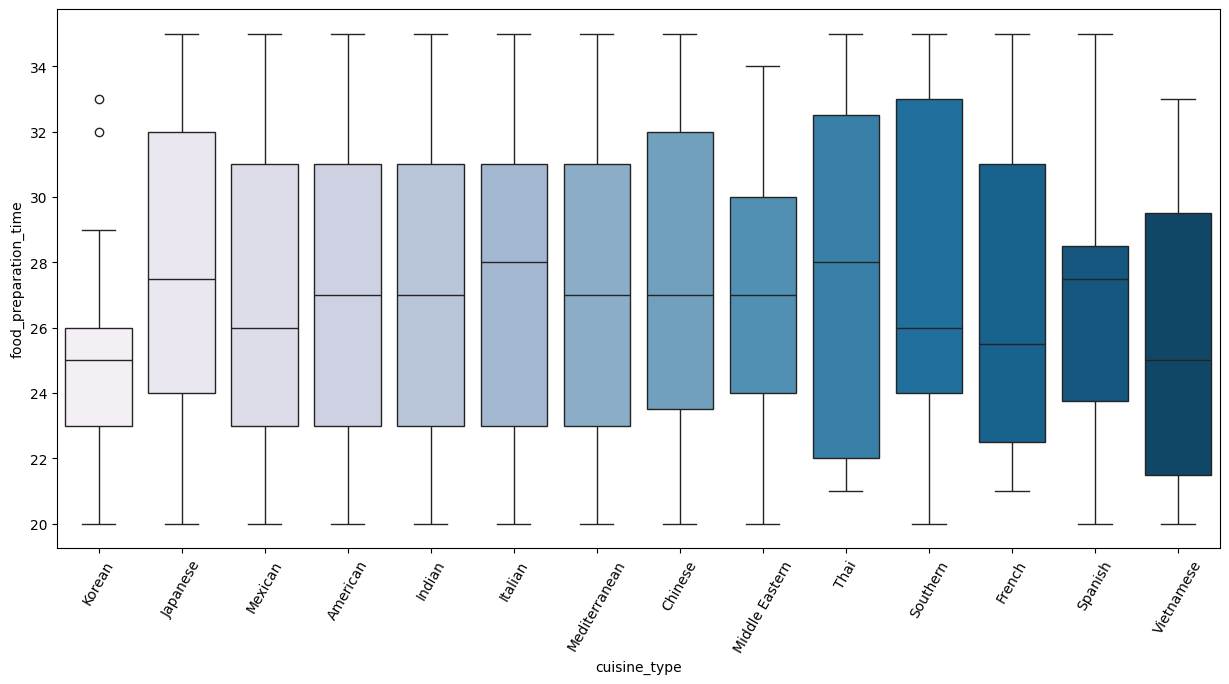

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
# Visualize the relationship between food preparation time and cuisine type using boxplot
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = dataframe, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

Day of the Week vs Delivery time

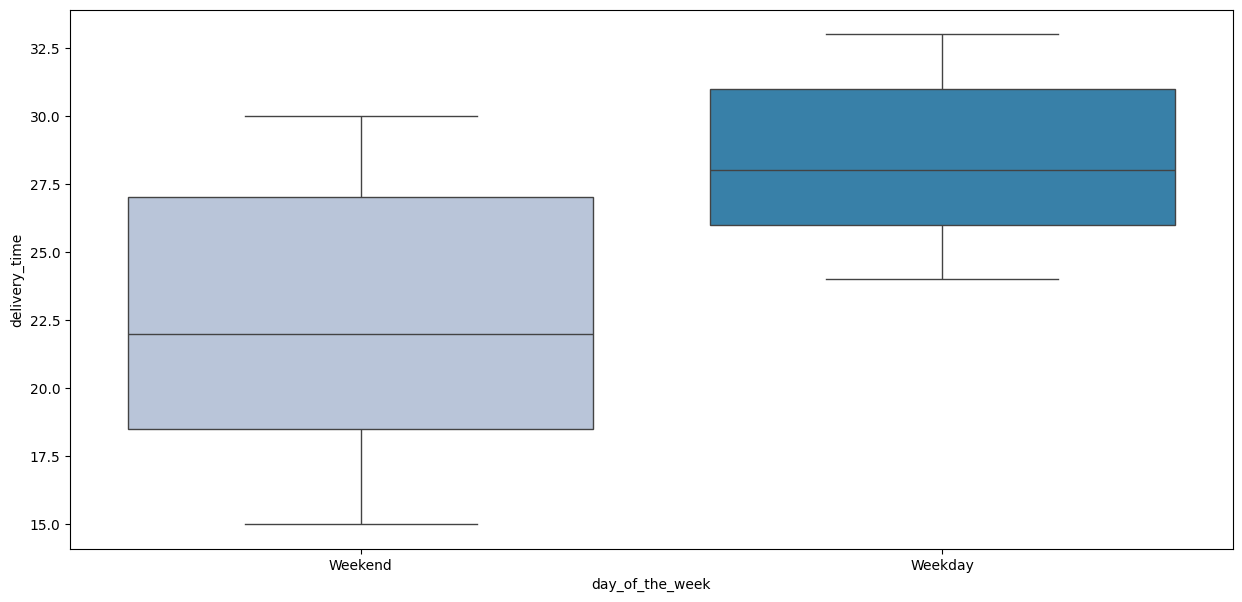

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
#Visualize the relationship between day of the week and delivery time using boxplot
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = dataframe, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

Rating vs Delivery time

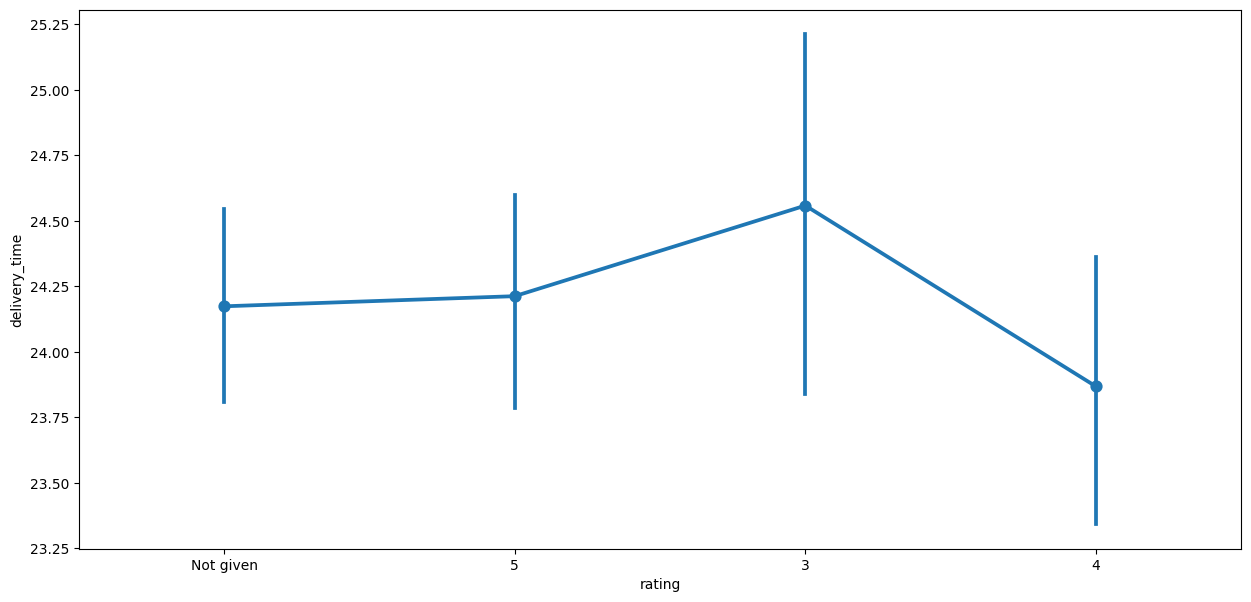

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = dataframe)
plt.show()

Rating vs Food preparation time

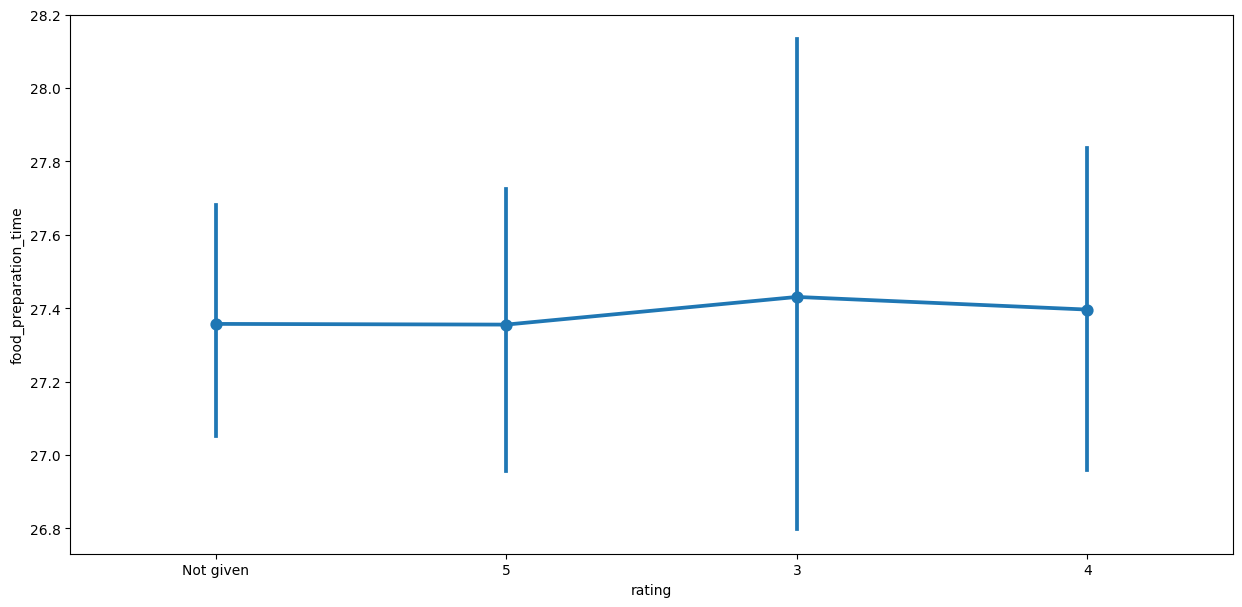

In [ ]:
# Relationship between rating and food preparation time using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = dataframe)
plt.show()

Rating vs Cost of the order

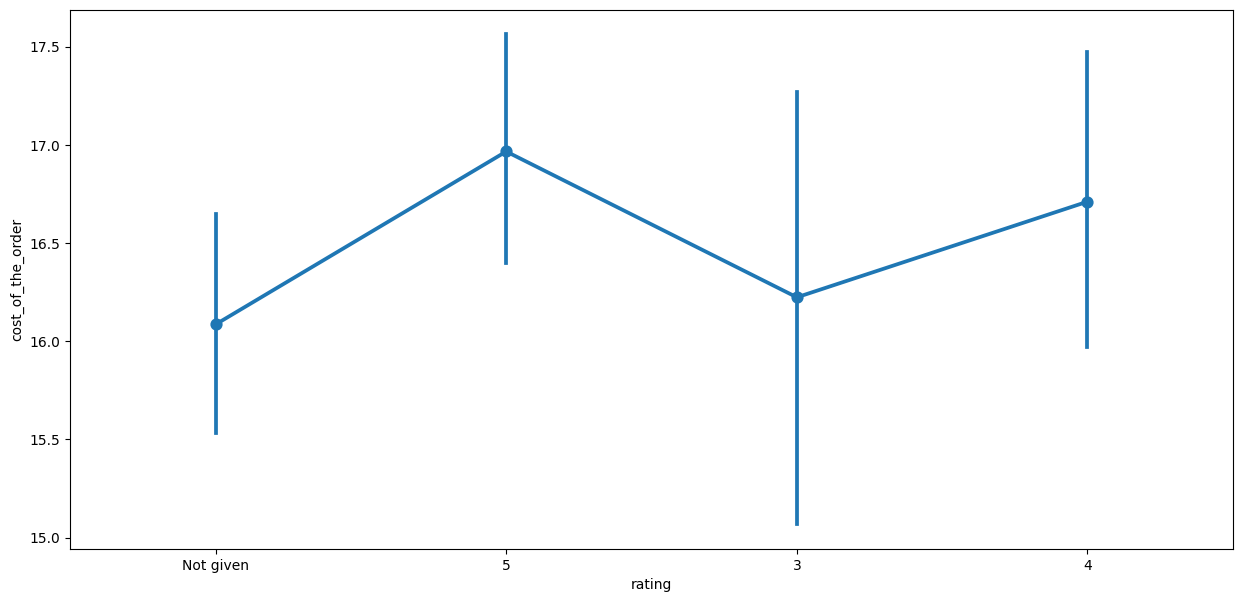

In [ ]:
# Relationship between rating and cost of the order using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = dataframe)
plt.show()

Correlation among variables

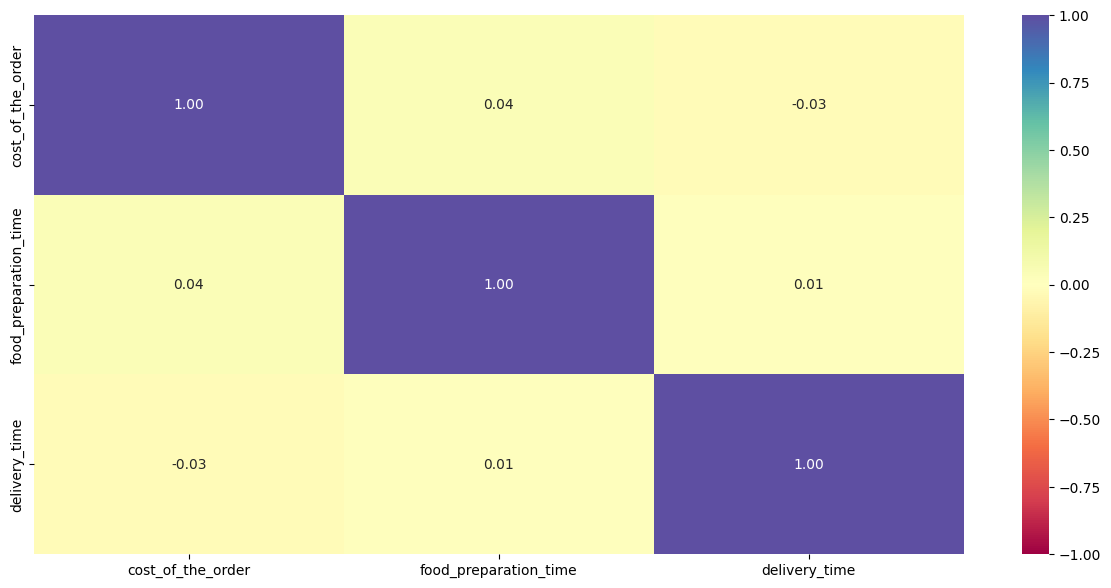

In [ ]:
# Plot the heatmap
columns_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(dataframe[columns_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Rated restaurants
dataframe_rated = dataframe[dataframe['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
dataframe_rated['rating'] = dataframe_rated['rating'].astype('int')

# Top 5 restaurants with their rating counts
dataframe_rating_count = dataframe_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
dataframe_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = dataframe_rating_count[dataframe_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Get the data of restaurants that have rating count more than 50
dataframe_mean_4 = dataframe_rated[dataframe_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings to find the mean rating of each restaurant
dataframe_mean_4_rating = dataframe_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# data rows average rating greater than 4
df_avg_rating_above_4 = dataframe_mean_4_rating[dataframe_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_above_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#create a function to calculate revenue for each order based on cost of the order
def calculate_revenue(cost):
    if(cost > 20):
      return cost * 0.25
    elif(cost > 5):
      return cost * 0.15
    else:
      return 0

#add a new column 'revenue' for each row
dataframe['revenue'] = dataframe['cost_of_the_order'].apply(calculate_revenue)

#print top 5 rows from dataframe with added new column revenue
dataframe.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#print sum of revenue column
net_revenue = dataframe['revenue'].sum()
print("Net revenue generated by the company across all orders :", '$', round(net_revenue, 2))

Net revenue generated by the company across all orders : $ 6166.3


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Add a new column to the dataframe to store the calculated total delivery time
dataframe['total_time_to_deliver'] = dataframe['food_preparation_time'] + dataframe['delivery_time']
dataframe.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time_to_deliver
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [ ]:
order_percentage_above_60_minutes = round((dataframe[dataframe['total_time_to_deliver'] > 60].shape[0] / dataframe.shape[0]) * 100, 2)
print("Percentage of orders that take more than 60 minutes to get delivered :", order_percentage_above_60_minutes, '%')

Percentage of orders that take more than 60 minutes to get delivered : 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Print mean delivery time on weekdays
print('The mean delivery time on weekdays is around',
      round(dataframe[dataframe['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


# Print mean delivery time on weekends
print('The mean delivery time on weekends is around',
      round(dataframe[dataframe['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Data values are available for every row in each column.  Not any data is missing and require to clean data or refill missing values with mean or mode

*  Data analysis in graph highlights us the factors which are important to increase the revenue of the company

*  To make Machine Learning model, we shall remove the outliers with ratings as 4 as they are not realitic and not proportional to delivery time or preparation time

* As per heat map, cost of order vs delivery time is inversely proportional to each other than other numerical data relationships

* Number of Weekend sales are (2.5 times) way more than weekday sales

* "Shake Shack" restaurant has the highest rating among all restaurants

* "American" cuisine type is most ordered one.

* Delivery time takes more during weekdays compared to weekends probably due to traffic

* more drivers can be alloted for weekends as more orders we get than weekdays

### Recommendations:

*  We shall have data in additional columns for how much the amount comes as commission to the company for every order
*  We shall add distance in miles between restaurant and the delivery point to have relationship of delivery time to distance in weekdays and weekends to access. We shall have these data analysis which could be really helpful for the business to increase the net revenue

* if cost of order is what company is charging from the customer, then we shall have additional data for the cost of order the restaurant charges for each order. Commission to the company can be another column in the dataset

* Can include the driver name as well with each order who delivered the food and can have relationship of driver to the rating he gets and his delivery speed etc.

* Customer's location information (city they reside) could help to determine from which city most of the orders are being placed in weekdays or weekends to determine the graph showing most important city of revenue. So that more drivers could serve those locations and could decrease delivery time

* Each driver could take multiple orders if the customer is on the way while delivering one order to save delivery time. May need to have similar route orders if demographic (location) information is added for every order in dataset

* delivery instructions can be saved and can produced if the same customer makes the next order to fetch and display while taking orders (optional)
